### X Education: Hot Leads for a focussed sales follow-up.
*********

#### Problem Statement:
***X Education*** gets a lot of leads, but their lead conversion rate is poor.

#### Solution Statement:
Many leads in sales funnel are not actual potential students but some of them are very potential leads.<br>
Solution is to identify the high potential prospective students and focus the sales follow-up activities on pursuing these hot leads.

#### Task:
Identify the potential leads from the response and sales activity data and score them accordingly.<br>
The driving questions are:<br>

1. Which responses are significant in predicting whether the lead will convert to a sale or not?
1. Generate a score for the convertible leads based on the probability of how potential a lead each of them could be.
1. Find who are the Hot Leads based on the above score so that the sales team can focus their effort on those leads.

*********

### Solution

#### Step 1: Import and Inspect Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Leads.csv')
pd.set_option('max_columns',None)

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
data.shape

(9240, 37)

#### Inspecting Missing Values

In [7]:
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Checking percentage of missing values

In [8]:
round(100*(data.isna().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Descriptive statistics

In [9]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Inspect Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Step 2: Data Preparation (Missing Values, Insignificant Columns, Categorical Variables, Outliers etc)

#### Converting some binary variables (Yes/No) to 0/1

In [11]:
## The following columns are Binary Variables:
# Do Not Email, Do Not call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper,
# Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses,
# Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque,
# A free copy of Mastering The Interview 

varlist=["Do Not Email","Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]
def binary_map(x):
    return x.map({'Yes':1,'No':0})
data[varlist]=data[varlist].apply(binary_map)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### Categorical Variables

One of the following strategies are used:
1. Drop missing/unanswered
2. Impute with modes
3. Drop columns having a significant number of same responses
4. Reduce number of levels (to optimize on the dummy variables)

##### 1. Lead Source

In [12]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

In [13]:
source=['Facebook','bing','google','Click2call','Press_Release','Live Chat','Social Media','welearnblog_Home','blog','WeLearn','testone','Pay per Click Ads','youtubechannel','NC_EDM']

In [14]:
data['Lead Source']=data['Lead Source'].apply(lambda x: 'Others' if x in source else x)

In [15]:
data['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                83
Name: Lead Source, dtype: int64

In [16]:
data['Lead Source'].fillna(data['Lead Source'].mode()[0],inplace=True)

In [17]:
data['Lead Source'].isnull().sum()

0

##### 2. Total Visits

In [18]:
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='TotalVisits'>

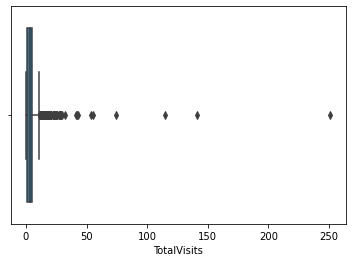

In [20]:
sns.boxplot(data['TotalVisits'])

In [21]:
data['TotalVisits'].fillna(data['TotalVisits'].mode()[0],inplace=True)

##### 3. Country and Specialization

In [22]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Nigeria                    4
Sweden                     3
Philippines                2
Uganda                     2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Italy                      2
Netherlands                2
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Tanzania                   1
Indonesia                  1
Denmark                    1
Malaysia      

In [23]:
data['Country'].fillna(data['Country'].mode()[0],inplace=True)

In [24]:
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
data.shape

(9240, 37)

In [26]:
data['Specialization'].fillna(data['Specialization'].mode()[0],inplace=True)

##### 4. 'How did you hear about X Education'

In [27]:
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [28]:
data['How did you hear about X Education'].fillna(data['How did you hear about X Education'].mode()[0],inplace=True)

**Note:**<br>
A Large percentage of students has not choosen this option 
So column can be dropped

In [29]:
data.drop('How did you hear about X Education',1,inplace=True)

##### 5. 'What is your current occupation'

In [30]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0],inplace=True)

In [32]:
data['What is your current occupation']=data['What is your current occupation'].apply(lambda x: 'Unemployed' if x in['Student','Other','Housewife','Businessman'] else x)

In [33]:
data['What is your current occupation'].value_counts()

Unemployed              8534
Working Professional     706
Name: What is your current occupation, dtype: int64

##### 6. 'What matters most to you in choosing a course'

In [34]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
data['What matters most to you in choosing a course'].fillna(data['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [36]:
data['Better Career Prospects']=data['What matters most to you in choosing a course'].apply(lambda x: 1 if x=='Better Career Prospects' else 0)

In [37]:
data['Better Career Prospects'].value_counts()

1    9237
0       3
Name: Better Career Prospects, dtype: int64

**Note:**
>For the variable **'What matters most to you in choosing a course'**, almost all of the values is 'Better Career Prospects'.<br>
>This means the variable is not going to vary its effect in the model significantly for different prospects.<br>
>While this possibly could be a crucial business insight, this will be insignificant for the model. Thus dropping this column


In [38]:
data.drop('What matters most to you in choosing a course',1,inplace=True)

##### 7. Tags

By data dictionary, this column is filled by the sales person after making a call. This could be a potentially significant column

In [39]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [40]:
data['Tags'].isnull().sum()

3353

In [41]:
data['Tags'].fillna(data['Tags'].mode()[0],inplace=True)

#### Tags are having too many levels. These are binned into three broad categories:

1. *Tags_DeadEnd*: Possible Dead-End calls as tagged by the sales people.
> Not doing further education, invalid number, wrong number given, Diploma holder (Not Eligible),'opp hangup','number not provided','Lost to Others','Closed by Horizzon'

1. *Tags_UnclearLeads*: Calls with no clear idea as tagged by the sales people.
> ringing,switched off,busy,Lost to EINS, in touch with EINS,'Graduation in progress','Lateral student','Recognition issue (DEC approval)','University not recognised'

1. *Tags_ReasonedLeads*: Calls where some reason was provided by the leads tagged by the sales people.
> 'Will Revert after reading the email','Interested in other courses','Already a student','Interested in full time MBA','Still Thinking','Want to take admission but has financial problems','Interested in Next batch','In confusion wheather part time or DLP','Shall take in next coming month'


In [42]:
tags_0=['Not doing further education', 'invalid number', 'wrong number given','Diploma holder (Not Eligible)','opp hangup','number not provided','Lost to Others','Closed by Horizzon']
tags_1=['ringing','switched off','busy','Lost to EINS', 'in touch with EINS','Graduation in progress','Lateral student','Recognition issue (DEC approval)','University not recognised']
tags_2=['Will Revert after reading the email','Interested in other courses','Already a student','Interested in full time MBA','Still Thinking','Want to take admission but has financial problems','Interested in Next batch','In confusion wheather part time or DLP','Shall take in next coming month']

In [43]:
data['Tags_DeadEnd']=data['Tags'].apply(lambda x: 1 if x in tags_0 else 0)

In [44]:
data['Tags_UnclearLeads']=data['Tags'].apply(lambda x: 1 if x in tags_1 else 0)
data['Tags_ReasonedLeads']=data['Tags'].apply(lambda x: 1 if x in tags_2 else 0)

In [45]:
data.drop('Tags',1,inplace=True)

##### 8. Lead Quality, 'Lead Profile'

In [46]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [47]:
data['Lead Quality'].fillna(data['Lead Quality'].mode()[0],inplace=True)

In [48]:
data['Lead Quality']=data['Lead Quality'].apply(lambda x: 'Not Sure_Low Rel' if x in ['Not Sure','Low in Relevance'] else x)

In [49]:
data['Lead Quality'].value_counts()

Might be             6327
Not Sure_Low Rel     1675
High in Relevance     637
Worst                 601
Name: Lead Quality, dtype: int64

In [50]:
data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [51]:
data['Lead Profile'].fillna(data['Lead Profile'].mode()[0],inplace=True)

In [52]:
data['Lead Profile']=data['Lead Profile'].apply(lambda x: 'Other Leads' if x in ['Student of SomeSchool','Lateral Student','Dual Specialization Student','Select'] else x)

In [53]:
data['Lead Profile'].value_counts()

Other Leads       7627
Potential Lead    1613
Name: Lead Profile, dtype: int64

##### 9. City, 'Asymmetrique Activity Index', 'Asymmetrique Activity Score'

In [54]:
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [55]:
data['City'].fillna(data['City'].mode()[0],inplace=True)

In [56]:
data['City']=data['City'].apply(lambda x: data['City'].mode()[0] if x=='Select' else x)

In [57]:
data['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [58]:
data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [59]:
data['Asymmetrique Activity Index'].fillna(data['Asymmetrique Activity Index'].mode()[0],inplace=True)

In [60]:
data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [61]:
data['Asymmetrique Activity Index'].fillna(data['Asymmetrique Activity Index'].mode()[0],inplace=True)

In [62]:
data['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

#### Checking for Outliers

<AxesSubplot:xlabel='Asymmetrique Activity Score'>

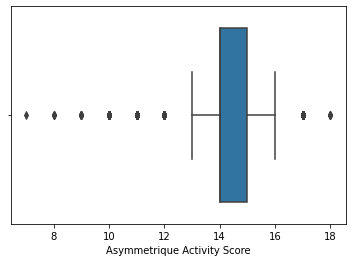

In [63]:
sns.boxplot(data['Asymmetrique Activity Score'])

In [64]:
data['Asymmetrique Activity Score'].fillna(data['Asymmetrique Activity Score'].mean(),inplace=True)

<AxesSubplot:xlabel='Asymmetrique Profile Score'>

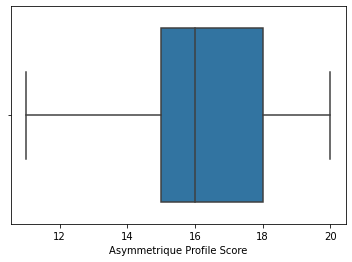

In [65]:
sns.boxplot(data['Asymmetrique Profile Score'])

In [66]:
data['Asymmetrique Profile Score'].fillna(data['Asymmetrique Profile Score'].mean(),inplace=True)

In [67]:
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

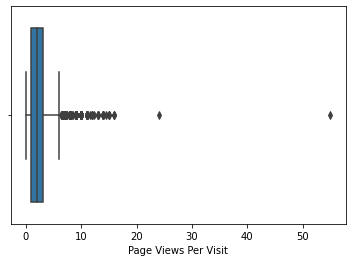

In [68]:
sns.boxplot(data['Page Views Per Visit'])

In [69]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mode()[0],inplace=True)

In [70]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [71]:
data['Last Activity'].fillna(data['Last Activity'].mode()[0],inplace=True)

In [72]:
data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [73]:
data['Asymmetrique Profile Index'].fillna(data['Asymmetrique Profile Index'].mode()[0],inplace=True)

In [74]:
data.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [75]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Better Career Prospects,Tags_DeadEnd,Tags_UnclearLeads,Tags_ReasonedLeads
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Select,Unemployed,0,0,0,0,0,0,0,0,Not Sure_Low Rel,0,0,Other Leads,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Modified,1,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Other Leads,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,Not Sure_Low Rel,0,0,Other Leads,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Other Leads,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,0,0


In [76]:
data['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Nigeria                    4
Sweden                     3
Philippines                2
Uganda                     2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Italy                      2
Netherlands                2
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Tanzania                   1
Indonesia                  1
Denmark                    1
Malaysia      

In [77]:
data['Country_India']=data['Country'].apply(lambda x: 1 if x=='India' else 0)

In [78]:
data.drop('Country',inplace=True,axis=1)

In [79]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Better Career Prospects,Tags_DeadEnd,Tags_UnclearLeads,Tags_ReasonedLeads,Country_India
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,0,0,0,0,0,0,0,Not Sure_Low Rel,0,0,Other Leads,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Modified,1,0,0,1,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Other Leads,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,Not Sure_Low Rel,0,0,Other Leads,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Other Leads,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,0,0,1


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [80]:
dummy1=pd.get_dummies(data[['Lead Origin','Lead Source','What is your current occupation','Better Career Prospects','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Lead Profile','City']],drop_first=True)

In [81]:
#'Last Activity',,'Lead Profile','Tags','Specialization',

In [82]:
dummy1.head()

,Better Career Prospects,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure_Low Rel,Lead Quality_Worst,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [83]:
data=pd.concat([data,dummy1],axis=1)

In [84]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Better Career Prospects,Tags_DeadEnd,Tags_UnclearLeads,Tags_ReasonedLeads,Country_India,Better Career Prospects,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure_Low Rel,Lead Quality_Worst,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,0,0,0,0,0,0,0,Not Sure_Low Rel,0,0,Other Leads,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Modified,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Other Leads,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,Not Sure_Low Rel,0,0,Other Leads,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,0,0,0,0,0,0,0,Might be,0,0,Other Leads,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [85]:
#### Dropping the repeated variables
data.drop(['Lead Origin','Lead Source','What is your current occupation','Better Career Prospects','Lead Quality'],1,inplace=True)

In [86]:
data.isna().sum()

Prospect ID                                             0
Lead Number                                             0
Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Last Activity                                           0
Specialization                                          0
Search                                                  0
Magazine                                                0
Newspaper Article                                       0
X Education Forums                                      0
Newspaper                                               0
Digital Advertisement                                   0
Through Recommendations                                 0
Receive More U

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Number                                           9240 non-null   int64  
 2   Do Not Email                                          9240 non-null   int64  
 3   Do Not Call                                           9240 non-null   int64  
 4   Converted                                             9240 non-null   int64  
 5   TotalVisits                                           9240 non-null   float64
 6   Total Time Spent on Website                           9240 non-null   int64  
 7   Page Views Per Visit                                  9240 non-null   float64
 8   Last Activity                                         9240

In [88]:
data.select_dtypes(include=np.number).columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Tags_DeadEnd',
       'Tags_UnclearLeads', 'Tags_ReasonedLeads', 'Country_India',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welin

<AxesSubplot:xlabel='TotalVisits'>

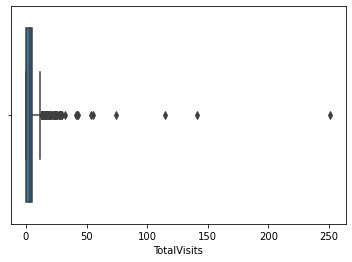

In [89]:
sns.boxplot(data['TotalVisits'])

In [90]:
data=data[data['TotalVisits']<20]

<AxesSubplot:xlabel='TotalVisits'>

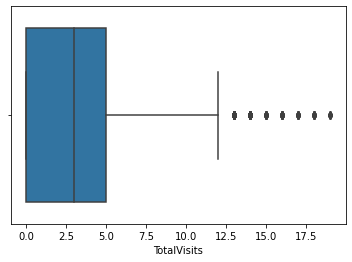

In [91]:
sns.boxplot(data['TotalVisits'])

In [92]:
data.shape

(9181, 58)

<AxesSubplot:xlabel='Total Time Spent on Website'>

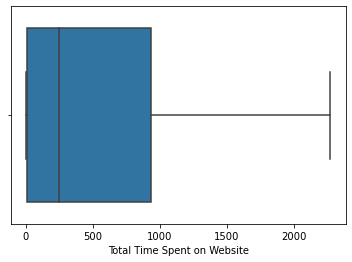

In [93]:
sns.boxplot(data['Total Time Spent on Website'])

<AxesSubplot:xlabel='Page Views Per Visit'>

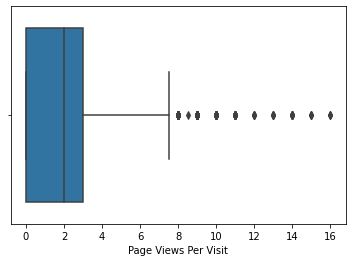

In [94]:
sns.boxplot(data['Page Views Per Visit'])

<AxesSubplot:xlabel='Asymmetrique Activity Score'>

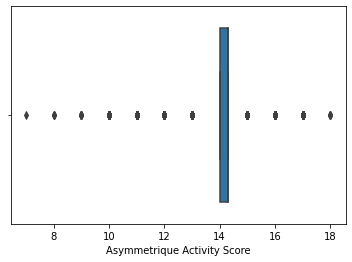

In [95]:
sns.boxplot(data['Asymmetrique Activity Score'])

<AxesSubplot:xlabel='Asymmetrique Profile Score'>

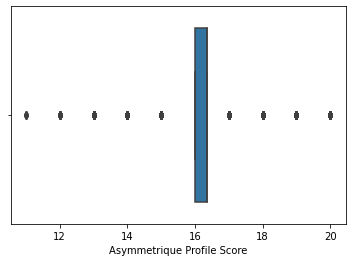

In [96]:
sns.boxplot(data['Asymmetrique Profile Score'])

In [97]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Tags_DeadEnd', 'Tags_UnclearLeads', 'Tags_ReasonedLeads',
       'Country_India', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_

In [98]:
data['Last Notable Activity'].value_counts()

Modified                        3394
Email Opened                    2813
SMS Sent                        2163
Page Visited on Website          298
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [99]:
data['Last Activity'].value_counts()

Email Opened                    3524
SMS Sent                        2733
Olark Chat Conversation          972
Page Visited on Website          614
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [100]:
data.drop(['Prospect ID','Lead Number','Last Activity','Specialization','Last Activity','Last Notable Activity','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','City'],1,inplace=True)

In [101]:
converted=(sum(data['Converted'])/len(data['Converted'].index))*100

In [102]:
converted

38.52521511817885

#### Step 3: Model Fitment and Tuning

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Tags_DeadEnd,Tags_UnclearLeads,Tags_ReasonedLeads,Country_India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure_Low Rel,Lead Quality_Worst,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,14.0,20.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,13.0,17.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,15.0,18.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [105]:
data.shape

(9181, 49)

In [106]:
y=data.pop('Converted')


#### Test/Train split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(data,y,train_size=0.7,test_size=0.3,random_state=100)

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits','Asymmetrique Activity Score','Asymmetrique Profile Score']]=scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits','Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [110]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Tags_DeadEnd,Tags_UnclearLeads,Tags_ReasonedLeads,Country_India,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure_Low Rel,Lead Quality_Worst,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Lead Profile_Potential Lead,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3555,0,0,-1.037750,0.256903,-1.121918,0,0,0,0,0,0,0,0,0,0,0.007586,0.007555,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
8055,0,0,-1.037750,-0.895640,-1.121918,0,0,0,0,0,0,0,0,0,0,-0.294780,1.994382,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
1843,0,0,-0.392819,-0.527769,-0.153998,0,0,0,0,0,0,0,0,0,0,-0.294780,1.246081,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1763,0,0,-0.070354,-0.404541,0.329962,0,0,0,0,0,0,0,0,0,0,0.692528,-0.998822,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3017,0,0,0.252111,1.230040,0.813922,0,0,0,0,0,0,0,0,0,0,0.007586,0.007555,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


#### Looking at Correlations

In [111]:
import matplotlib.pyplot as plt

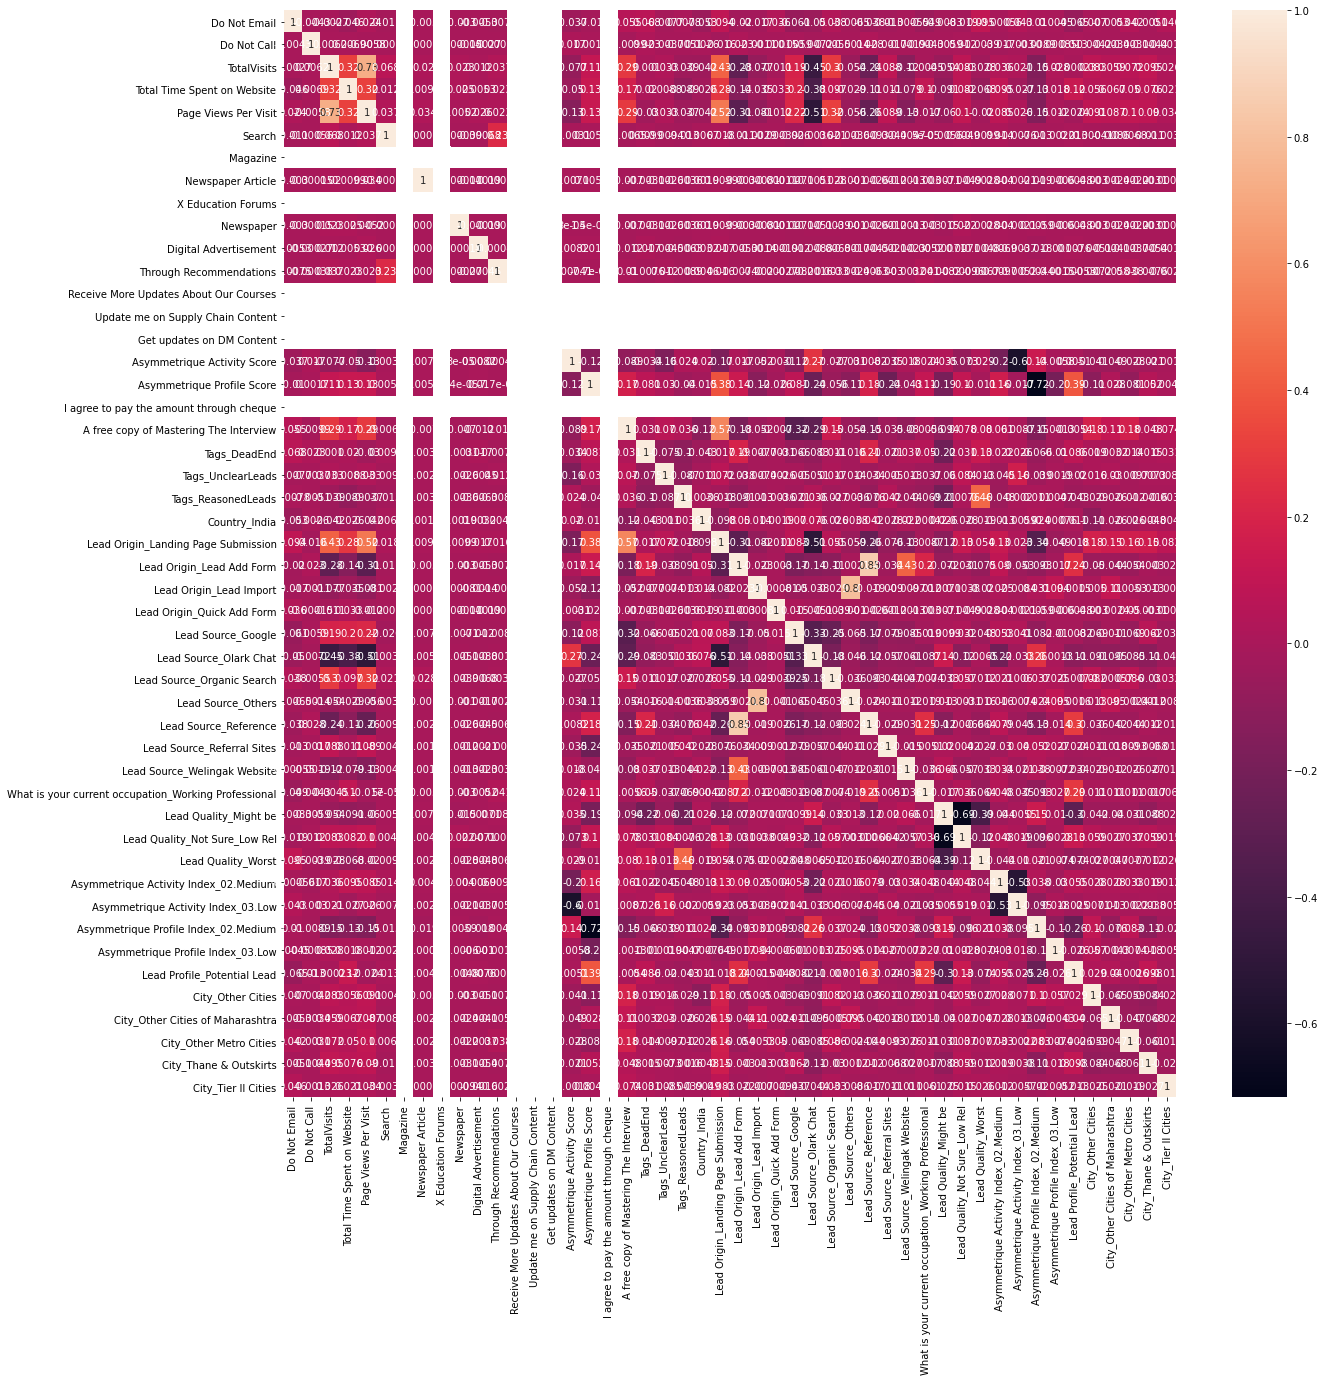

In [112]:
plt.figure(figsize = (20,20))      
sns.heatmap(data.corr(),annot = True)
plt.show()

**Note:**

A good deal of correlation is observed. We shall use RFE for eliminating features

#### Quick glance at the model appeal

In [113]:
import statsmodels.api as sm

In [114]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [115]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6426
Model:                            GLM   Df Residuals:                     6383
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2349.4
Date:                Tue, 10 Aug 2021   Deviance:                       4698.7
Time:                        22:02:16   Pearson chi2:                 7.87e+03
No. Iterations:                    33                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7391      0.438     -1.686      0.092      -1.598       0.120
Do Not Email                                            -1.2084      0.170     -7.104      0.000      -1.542      -0.875
Do Not Call                                             19.1621   3.13e+04      0.001      1.000   -6.14e+04    6.14e+04
TotalVisits                                              0.1495      0.054      2.788      0.005       0.044       0.255
Total Time Spent on Website                              1.1209      0.044     25.486      0.000       1.035       1.207
Page Views Per Visit                                    -0.0926      0.059     -1.570      0.116      -0.208       0.023
Search                                                  -1.2150      0.915     -1.328      0.184      -3.008       0.578
Magazine                                             -2.101e-07      0.104  -2.03e-06      1.000      -0.203       0.203
Newspaper Article                                       27.2962   6.97e+05   3.92e-05      1.000   -1.37e+06    1.37e+06
X Education Forums                                    4.694e-08      0.029    1.6e-06      1.000      -0.057       0.057
Newspaper                                              -26.3961   1.21e+05     -0.000      1.000   -2.38e+05    2.38e+05
Digital Advertisement                                   -0.9596      2.410     -0.398      0.690      -5.683       3.763
Through Recommendations                                  0.7937      2.225      0.357      0.721      -3.567       5.155
Receive More Updates About Our Courses                5.893e-08      0.018   3.24e-06      1.000      -0.036       0.036
Update me on Supply Chain Content                     2.022e-07      0.090   2.24e-06      1.000      -0.177       0.177
Get updates on DM Content                             2.777e-07      0.131   2.12e-06      1.000      -0.257       0.257
Asymmetrique Activity Score                              1.0689      0.084     12.692      0.000       0.904       1.234
Asymmetrique Profile Score                              -0.0248      0.074     -0.337      0.736      -0.169       0.120
I agree to pay the amount through cheque             -1.365e-07      0.063  -2.16e-06      1.000      -0.124       0.124
A free copy of Mastering The Interview                   0.0944      0.114      0.826      0.409      -0.129       0.318
Tags_DeadEnd                                            -0.5330      0.172     -3.102      0.002      -0.870      -0.196
Tags_UnclearLeads                                        0.1530      0.151      1.014      0.311      -0.143       0.449
Tags_ReasonedLeads                                      -3

In [116]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

 #### Feature Selection Using RFE

In [117]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [118]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False])

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Search', False, 2),
 ('Magazine', False, 32),
 ('Newspaper Article', False, 7),
 ('X Education Forums', False, 29),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 13),
 ('Through Recommendations', False, 24),
 ('Receive More Updates About Our Courses', False, 34),
 ('Update me on Supply Chain Content', False, 30),
 ('Get updates on DM Content', False, 31),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 26),
 ('I agree to pay the amount through cheque', False, 33),
 ('A free copy of Mastering The Interview', False, 21),
 ('Tags_DeadEnd', False, 5),
 ('Tags_UnclearLeads', False, 14),
 ('Tags_ReasonedLeads', True, 1),
 ('Country_India', False, 6),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2

#### RFE results feature-wise list along with their ranks

In [120]:
rfe_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_df.rename(columns={0: 'features', 1:'rfe_support', 2:'rfe_ranking'}, inplace = True)
rfe_df.sort_values('rfe_ranking')

,features,rfe_support,rfe_ranking
0,Do Not Email,True,1
24,Lead Origin_Lead Add Form,True,1
15,Asymmetrique Activity Score,True,1
33,Lead Source_Welingak Website,True,1
34,What is your current occupation_Working Profes...,True,1
35,Lead Quality_Might be,True,1
9,Newspaper,True,1
37,Lead Quality_Worst,True,1
36,Lead Quality_Not Sure_Low Rel,True,1
38,Asymmetrique Activity Index_02.Medium,True,1


#### Columns Selected after RFE

In [121]:
col = X_train.columns[rfe.support_]

In [122]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Asymmetrique Activity Score', 'Tags_ReasonedLeads',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure_Low Rel',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Activity Index_03.Low',
       'Asymmetrique Profile Index_03.Low', 'Lead Profile_Potential Lead'],
      dtype='object')

#### Step 4: Model Fitment

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()


In [124]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6426
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.4
Date:                Tue, 10 Aug 2021   Deviance:                       4776.8
Time:                        22:02:20   Pearson chi2:                 7.79e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3235      0.338     -0.956      0.339      -0.986       0.339
Do Not Email                                            -1.3152      0.164     -8.006      0.000      -1.637      -0.993
Total Time Spent on Website                              1.0302      0.039     26.720      0.000       0.955       1.106
Newspaper                                              -22.3305   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Asymmetrique Activity Score                              1.1230      0.081     13.866      0.000       0.964       1.282
Tags_ReasonedLeads                                      -3.7638      0.301    -12.488      0.000      -4.355      -3.173
Lead Origin_Lead Add Form                                2.7571      0.213     12.935      0.000       2.339       3.175
Lead Source_Welingak Website                             3.0526      0.762      4.004      0.000       1.558       4.547
What is your current occupation_Working Professional     2.6380      0.212     12.472      0.000       2.223       3.053
Lead Quality_Might be                                   -2.7735      0.275    -10.099      0.000      -3.312      -2.235
Lead Quality_Not Sure_Low Rel                           -2.6147      0.279     -9.379      0.000      -3.161      -2.068
Lead Quality_Worst                                      -4.7379      0.444    -10.672      0.000      -5.608      -3.868
Asymmetrique Activity Index_02.Medium                    2.2340      0.218     10.247      0.000       1.807       2.661
Asymmetrique Activity Index_03.Low                       2.7708      0.502      5.522      0.000       1.787       3.754
Asymmetrique Profile Index_03.Low                        1.1803      0.581      2.032      0.042       0.042       2.319
Lead Profile_Potential Lead                              1.6380      0.125     13.108      0.000       1.393       1.883
========================================================================================================================
"""

In [125]:
X_train=X_train[col]

In [126]:
X_train_1=X_train.drop('Newspaper',1)

In [127]:
X_train_sm=sm.add_constant(X_train_1)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6426
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2390.3
Date:                Tue, 10 Aug 2021   Deviance:                       4780.6
Time:                        22:02:20   Pearson chi2:                 7.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3235      0.338     -0.957      0.339      -0.986       0.339
Do Not Email                                            -1.3134      0.164     -7.998      0.000      -1.635      -0.992
Total Time Spent on Website                              1.0275      0.039     26.685      0.000       0.952       1.103
Asymmetrique Activity Score                              1.1216      0.081     13.856      0.000       0.963       1.280
Tags_ReasonedLeads                                      -3.7610      0.301    -12.481      0.000      -4.352      -3.170
Lead Origin_Lead Add Form                                2.7554      0.213     12.930      0.000       2.338       3.173
Lead Source_Welingak Website                             3.0510      0.762      4.003      0.000       1.557       4.545
What is your current occupation_Working Professional     2.6383      0.211     12.477      0.000       2.224       3.053
Lead Quality_Might be                                   -2.7709      0.275    -10.094      0.000      -3.309      -2.233
Lead Quality_Not Sure_Low Rel                           -2.6177      0.279     -9.393      0.000      -3.164      -2.072
Lead Quality_Worst                                      -4.7346      0.444    -10.669      0.000      -5.604      -3.865
Asymmetrique Activity Index_02.Medium                    2.2314      0.218     10.239      0.000       1.804       2.659
Asymmetrique Activity Index_03.Low                       2.7673      0.502      5.517      0.000       1.784       3.750
Asymmetrique Profile Index_03.Low                        1.1818      0.581      2.036      0.042       0.044       2.320
Lead Profile_Potential Lead                              1.6403      0.125     13.131      0.000       1.395       1.885
========================================================================================================================
"""

In [128]:
X_train_1.shape

(6426, 14)

#### Checking VIFs

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Asymmetrique Activity Index_02.Medium,11.40
7,Lead Quality_Might be,8.28
11,Asymmetrique Activity Index_03.Low,3.01
8,Lead Quality_Not Sure_Low Rel,2.90
2,Asymmetrique Activity Score,2.40
9,Lead Quality_Worst,2.06
4,Lead Origin_Lead Add Form,1.63
13,Lead Profile_Potential Lead,1.60
3,Tags_ReasonedLeads,1.41
5,Lead Source_Welingak Website,1.30


In [130]:
#Asymmetrique Activity Index_02.Medium has a very high VIF
X_train_2=X_train_1.drop('Asymmetrique Activity Index_02.Medium',1)

In [131]:
X_train_sm=sm.add_constant(X_train_2)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6426
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2446.2
Date:                Tue, 10 Aug 2021   Deviance:                       4892.5
Time:                        22:02:21   Pearson chi2:                 7.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7599      0.267      6.598      0.000       1.237       2.283
Do Not Email                                            -1.2582      0.163     -7.721      0.000      -1.578      -0.939
Total Time Spent on Website                              1.0277      0.038     27.029      0.000       0.953       1.102
Asymmetrique Activity Score                              0.4550      0.043     10.607      0.000       0.371       0.539
Tags_ReasonedLeads                                      -3.7884      0.300    -12.648      0.000      -4.375      -3.201
Lead Origin_Lead Add Form                                2.8427      0.209     13.585      0.000       2.433       3.253
Lead Source_Welingak Website                             3.0052      0.753      3.991      0.000       1.529       4.481
What is your current occupation_Working Professional     2.6296      0.208     12.666      0.000       2.223       3.037
Lead Quality_Might be                                   -2.7488      0.268    -10.259      0.000      -3.274      -2.224
Lead Quality_Not Sure_Low Rel                           -2.5620      0.272     -9.419      0.000      -3.095      -2.029
Lead Quality_Worst                                      -4.6588      0.437    -10.671      0.000      -5.514      -3.803
Asymmetrique Activity Index_03.Low                      -1.1361      0.330     -3.439      0.001      -1.784      -0.489
Asymmetrique Profile Index_03.Low                        0.9772      0.576      1.697      0.090      -0.151       2.106
Lead Profile_Potential Lead                              1.6000      0.121     13.208      0.000       1.363       1.837
========================================================================================================================
"""

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Asymmetrique Activity Index_03.Low,11.40
7,Lead Quality_Might be,8.28
11,Asymmetrique Profile Index_03.Low,3.01
8,Lead Quality_Not Sure_Low Rel,2.90
2,Asymmetrique Activity Score,2.40
9,Lead Quality_Worst,2.06
4,Lead Origin_Lead Add Form,1.63
3,Tags_ReasonedLeads,1.41
5,Lead Source_Welingak Website,1.30
6,What is your current occupation_Working Profes...,1.26


In [133]:
#Asymmetrique Asymmetrique Activity Index_03.Low also has a very high VIF
X_train_3=X_train_2.drop('Asymmetrique Activity Index_03.Low',1)

In [134]:
X_train_sm=sm.add_constant(X_train_3)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm3.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6426
Model:                            GLM   Df Residuals:                     6413
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2453.1
Date:                Tue, 10 Aug 2021   Deviance:                       4906.1
Time:                        22:02:21   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6900      0.263      6.427      0.000       1.175       2.205
Do Not Email                                            -1.2572      0.163     -7.727      0.000      -1.576      -0.938
Total Time Spent on Website                              1.0327      0.038     27.233      0.000       0.958       1.107
Asymmetrique Activity Score                              0.5213      0.038     13.631      0.000       0.446       0.596
Tags_ReasonedLeads                                      -3.7835      0.298    -12.692      0.000      -4.368      -3.199
Lead Origin_Lead Add Form                                2.8775      0.209     13.745      0.000       2.467       3.288
Lead Source_Welingak Website                             2.9362      0.748      3.927      0.000       1.471       4.401
What is your current occupation_Working Professional     2.6094      0.205     12.745      0.000       2.208       3.011
Lead Quality_Might be                                   -2.7097      0.265    -10.242      0.000      -3.228      -2.191
Lead Quality_Not Sure_Low Rel                           -2.5132      0.269     -9.354      0.000      -3.040      -1.987
Lead Quality_Worst                                      -4.6494      0.435    -10.684      0.000      -5.502      -3.796
Asymmetrique Profile Index_03.Low                        0.9633      0.574      1.678      0.093      -0.162       2.088
Lead Profile_Potential Lead                              1.6025      0.121     13.276      0.000       1.366       1.839
========================================================================================================================
"""

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,1.55
3,Tags_ReasonedLeads,1.41
11,Lead Profile_Potential Lead,1.39
9,Lead Quality_Worst,1.37
5,Lead Source_Welingak Website,1.30
6,What is your current occupation_Working Profes...,1.25
7,Lead Quality_Might be,1.22
8,Lead Quality_Not Sure_Low Rel,1.15
0,Do Not Email,1.11
1,Total Time Spent on Website,1.08


In [136]:
#Asymmetrique Asymmetrique Profile Index_03.Low also and Assymmetrique Activity Score have identiical VIF
X_train_4=X_train_3.drop('Asymmetrique Profile Index_03.Low',1)

In [137]:
X_train_sm=sm.add_constant(X_train_4)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6426
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.5
Date:                Tue, 10 Aug 2021   Deviance:                       4909.0
Time:                        22:02:22   Pearson chi2:                 7.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6921      0.263      6.435      0.000       1.177       2.207
Do Not Email                                            -1.2493      0.162     -7.705      0.000      -1.567      -0.932
Total Time Spent on Website                              1.0332      0.038     27.254      0.000       0.959       1.108
Asymmetrique Activity Score                              0.5222      0.038     13.647      0.000       0.447       0.597
Tags_ReasonedLeads                                      -3.7824      0.298    -12.681      0.000      -4.367      -3.198
Lead Origin_Lead Add Form                                2.8737      0.209     13.732      0.000       2.464       3.284
Lead Source_Welingak Website                             2.9354      0.748      3.927      0.000       1.470       4.401
What is your current occupation_Working Professional     2.6170      0.204     12.801      0.000       2.216       3.018
Lead Quality_Might be                                   -2.7085      0.265    -10.238      0.000      -3.227      -2.190
Lead Quality_Not Sure_Low Rel                           -2.5105      0.269     -9.344      0.000      -3.037      -1.984
Lead Quality_Worst                                      -4.6526      0.435    -10.691      0.000      -5.506      -3.800
Lead Profile_Potential Lead                              1.5982      0.121     13.242      0.000       1.362       1.835
========================================================================================================================
"""

### Task 1: Responses that are significant in predicting whether the lead will convert to a sale.

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,1.55
3,Tags_ReasonedLeads,1.41
10,Lead Profile_Potential Lead,1.39
9,Lead Quality_Worst,1.37
5,Lead Source_Welingak Website,1.30
6,What is your current occupation_Working Profes...,1.25
7,Lead Quality_Might be,1.21
8,Lead Quality_Not Sure_Low Rel,1.15
0,Do Not Email,1.11
1,Total Time Spent on Website,1.08


#### Top Responses significant predicting whether the lead will be converting to a scale.

In [139]:
coefs = res1.params
coefs

const                                                   1.692078
Do Not Email                                           -1.249291
Total Time Spent on Website                             1.033217
Asymmetrique Activity Score                             0.522155
Tags_ReasonedLeads                                     -3.782388
Lead Origin_Lead Add Form                               2.873692
Lead Source_Welingak Website                            2.935398
What is your current occupation_Working Professional    2.617035
Lead Quality_Might be                                  -2.708540
Lead Quality_Not Sure_Low Rel                          -2.510515
Lead Quality_Worst                                     -4.652646
Lead Profile_Potential Lead                             1.598161
dtype: float64

#### Top Contributing Variables

In [140]:
coefs.abs().sort_values(ascending = False)

Lead Quality_Worst                                      4.652646
Tags_ReasonedLeads                                      3.782388
Lead Source_Welingak Website                            2.935398
Lead Origin_Lead Add Form                               2.873692
Lead Quality_Might be                                   2.708540
What is your current occupation_Working Professional    2.617035
Lead Quality_Not Sure_Low Rel                           2.510515
const                                                   1.692078
Lead Profile_Potential Lead                             1.598161
Do Not Email                                            1.249291
Total Time Spent on Website                             1.033217
Asymmetrique Activity Score                             0.522155
dtype: float64

#### Top Focus Variables

In [141]:
coefs.sort_values(ascending = False)

Lead Source_Welingak Website                            2.935398
Lead Origin_Lead Add Form                               2.873692
What is your current occupation_Working Professional    2.617035
const                                                   1.692078
Lead Profile_Potential Lead                             1.598161
Total Time Spent on Website                             1.033217
Asymmetrique Activity Score                             0.522155
Do Not Email                                           -1.249291
Lead Quality_Not Sure_Low Rel                          -2.510515
Lead Quality_Might be                                  -2.708540
Tags_ReasonedLeads                                     -3.782388
Lead Quality_Worst                                     -4.652646
dtype: float64

#### Task 2: Scoring for the convertible leads based on the probability of how potential a lead, each of them, could be.

In [142]:
y_train_pred = res1.predict(X_train_sm).values.reshape(-1)

In [143]:
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_Prob
3555,1,0.980599
8055,1,0.993261
1843,0,0.152428
1763,0,0.007727
3017,1,0.564242


#### Task 3: Predicting Hot Leads

In [144]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted
3555,1,0.980599,1
8055,1,0.993261,1
1843,0,0.152428,0
1763,0,0.007727,0
3017,1,0.564242,1


#### Confusion Matrix

In [145]:
from sklearn import metrics

In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3541  385]
 [ 677 1823]]


In [147]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.834733893557423


In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
TP / float(TP+FN)

0.7292

In [150]:
TN / float(TN+FP)

0.9019358125318391

In [151]:
print(FP/ float(TN+FP))

0.09806418746816098


In [152]:
print (TP / float(TP+FP))

0.8256340579710145


In [153]:
print (TN / float(TN+ FN))

0.8394973921289711


#### Step 5: Model Evaluation and Optimization

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

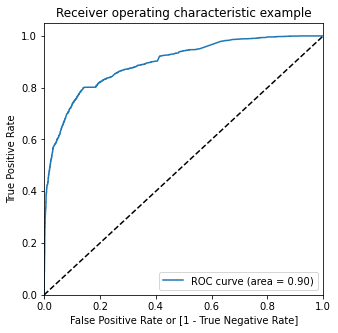

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Area under the ROC Curve is ***0.9***. Which means this is ***a good model***.

In [157]:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3555,1,0.980599,1,1,1,1,1,1,1,1,1,1,1
8055,1,0.993261,1,1,1,1,1,1,1,1,1,1,1
1843,0,0.152428,0,1,1,0,0,0,0,0,0,0,0
1763,0,0.007727,0,1,0,0,0,0,0,0,0,0,0
3017,1,0.564242,1,1,1,1,1,1,1,0,0,0,0


### Determining optimum probability cut-off

In [158]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy   sensi     speci
0.0   0.0  0.389045  1.0000  0.000000
0.1   0.1  0.578120  0.9864  0.318136
0.2   0.2  0.751945  0.8856  0.666836
0.3   0.3  0.805322  0.8272  0.791391
0.4   0.4  0.836446  0.7868  0.868059
0.5   0.5  0.834734  0.7292  0.901936
0.6   0.6  0.824619  0.6488  0.936577
0.7   0.7  0.811080  0.5632  0.968925
0.8   0.8  0.783224  0.4696  0.982934
0.9   0.9  0.759259  0.3928  0.992613


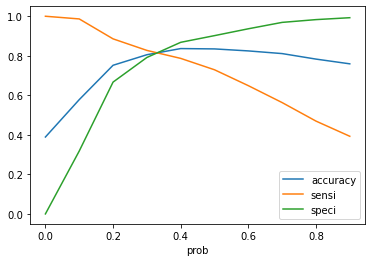

In [159]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Note:

At the Probability of **approx. 0.3**, the sensitivity and specificity curves cross each other. This gives us the optimum cut-off point. We can proceed calculating the metrics at this point.

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3555,1,0.980599,1,1,1,1,1,1,1,1,1,1,1,1
8055,1,0.993261,1,1,1,1,1,1,1,1,1,1,1,1
1843,0,0.152428,0,1,1,0,0,0,0,0,0,0,0,0
1763,0,0.007727,0,1,0,0,0,0,0,0,0,0,0,0
3017,1,0.564242,1,1,1,1,1,1,1,0,0,0,0,1


In [161]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8053221288515406

In [162]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3107,  819],
       [ 432, 2068]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Sensitivity
TP / float(TP+FN)

0.8272

In [165]:
# Specificity
TN / float(TN+FP)

0.7913907284768212

In [166]:
print(FP/ float(TN+FP))

0.20860927152317882


In [167]:
print (TP / float(TP+FP))

0.7163145133356426


In [168]:
print (TN / float(TN+ FN))


0.8779316191014411


In [169]:
# Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7163145133356426

In [170]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8272

In [171]:
from sklearn.metrics import precision_score, recall_score

In [172]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7163145133356426

In [173]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8272

In [174]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits','Asymmetrique Activity Score','Asymmetrique Profile Score']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits','Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [175]:
X_test=X_test[X_train_4.columns]

In [176]:
X_test_sm=sm.add_constant(X_test)

In [177]:
y_test_pred=res1.predict(X_test_sm)

### Task 2: Probability Score for the potential leads

In [178]:
y_test_pred_final=pd.DataFrame({'Converted':y_test,'Converted_prob':y_test_pred})
y_test_pred_final

,Converted,Converted_prob
6187,0,0.569190
7610,0,0.178430
7084,0,0.254505
491,0,0.143002
4222,0,0.728445
...,...,...
7246,0,0.094872
2727,1,0.995274
501,0,0.129145
8330,1,0.999239


### Task 3: Hot Leads among the potential leads

In [179]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [180]:
y_test_pred_final

,Converted,Converted_prob,final_predicted
6187,0,0.569190,1
7610,0,0.178430,0
7084,0,0.254505,0
491,0,0.143002,0
4222,0,0.728445,1
...,...,...,...
7246,0,0.094872,0
2727,1,0.995274,1
501,0,0.129145,0
8330,1,0.999239,1


In [181]:
## Accuracy
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8010889292196007

In [182]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1362,  356],
       [ 192,  845]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [184]:
# Sensitivity
TP / float(TP+FN)

0.8148505303760849

In [185]:
# Specificity
TN / float(TN+FP)

0.7927823050058207

In [186]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.7035803497085762

In [187]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8272

### Assignnent Subjective Questions:

1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

> **Lead Source_Welingak Website**<br>
> **Lead Origin_Lead Add Form**<br>
> **What is your current occupation_Working Professional**<br>

2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

> **Lead Source_Welingak Website**<br>
> **Lead Origin_Lead Add Form**<br>
> **What is your current occupation_Working Professional**<br>

3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

> This is essentially a peak calling season for X Education and thus to enhance as much mileage as possible and maximize on the caller availability, all the people have been predicted by the model (probability > 0.3) can be called.<br>
>To increase probability of getting conversions early-on in the process, the list can be prioritized based on the scores and can be called in the descending order of scores.


4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

> This is a sensitive calling season for X Education and thus to be as efficient as possible by maximizing the conversion rate, the callers can be asked to focus on people with most contributions.<br>
>Based on domain knowledge, we can focus on top 3 or top 5 people. As a matter of fact, The model has identified 3 specific types of Leads:<br>
><br>
>1. Leads who have come from the Welingak website, **Lead Source_Welingak Website**<br>
>2. Leads who have been identified as a lead by triggering the 'Lead Add Form' user action, **Lead Origin_Lead Add Form**<br>
>3. Leads who are working professionals and possibly have a specific reason in their minds for the course and perhaps lesser monetary challenges in taking up a course. **What is your current occupation_Working Professional**<br>
><br>
>The actual focus group of leads for the callers can be decided based on a detailed business discussion backed by the model statistics and business accumen. 



### Note:

The below three variables are the most significant influencers for the model.

> **Lead Quality_Worst**<br>
> **Tags_ReasonedLeads** (These are leads whom the sales people have tagged as have been reasoned by the lead during a sales call)<br>
> **Lead Source_Welingak Website**<br>

We have to note that the first two are negatively inlfuencing the conversion. Essentially, these are people who are more likely will not convert.


*********